# Open csvs

In [6]:
import pandas as pd

cc_info = pd.read_csv("../datasets/CreditCard-Fraud-Detection-csvs/cc_info.csv")
transactions = pd.read_csv("../datasets/CreditCard-Fraud-Detection-csvs/transactions.csv")

In [11]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [9]:
cc_info.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [15]:
transactions.describe()

,credit_card,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669
std,2.555803e+15,124.655954,20.135015,5.391695
min,1.003715e+15,0.010000,-179.392887,-68.046553
25%,3.344214e+15,29.970000,-80.209708,40.487726
50%,5.353426e+15,58.470000,-73.199737,42.403066
75%,7.646245e+15,100.400000,-72.091933,43.180015
max,9.999757e+15,999.970000,179.917513,78.914330


In [ ]:
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [16]:
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


# Merge

In [17]:
cc_info_transactions = cc_info.merge(transactions, how="left",on="credit_card")

In [18]:
cc_info_transactions.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


In [19]:
cc_info_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   city                       294588 non-null  object 
 2   state                      294588 non-null  object 
 3   zipcode                    294588 non-null  int64  
 4   credit_card_limit          294588 non-null  int64  
 5   date                       294588 non-null  object 
 6   transaction_dollar_amount  294588 non-null  float64
 7   Long                       294588 non-null  float64
 8   Lat                        294588 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 22.5+ MB


# Plot

In [22]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


C:\Users\muham\AppData\Local\Temp\ipykernel_11672\2236112498.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


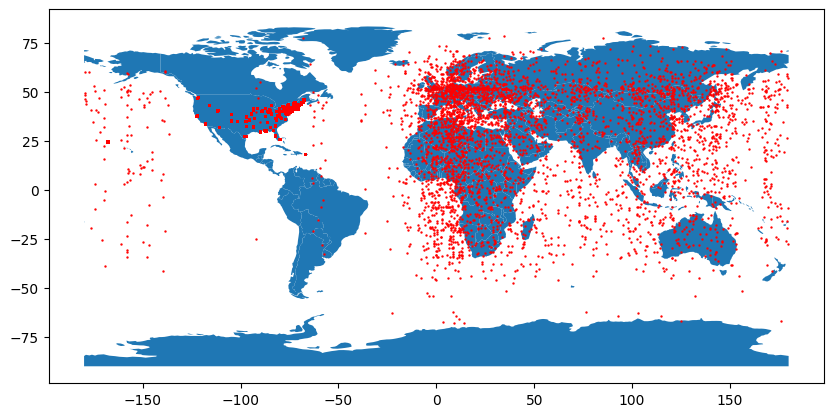

In [28]:

geometry = [Point(xy) for xy in zip(cc_info_transactions['Long'], cc_info_transactions['Lat'])]
gdf = GeoDataFrame(cc_info_transactions, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.5);